Trial version of what data in our spec should look like. User is burdened with formatting the data in our spec. 

In [84]:
import numpy as np
import json 
import pandas as pd
%matplotlib inline

### Start with the data: edgelist should be in csv and should be sparse

In [4]:
df = pd.read_csv("exampleEdgelist.csv")
df

,Node Source,Node Target,weight
0,11,22,22
1,22,33,3
2,33,44,0
3,44,66,1
4,55,11,11
5,66,55,10


### Now to descibe the attributes, create a json: graph attributes, node attributes and edge attributes

Note: it would be redundant to list node source/target in the edge attributes since the edgelist file contains that already


In [8]:
### I'll read in my csv containing nodes with two attributes
df2 = pd.read_csv("exampleNode.csv", index_col = 0)
dictOfdf = df2.to_dict('index')
dictOfdf

{11: {'Name': 'xx', 'Location': 123, 'Gender': 'male', 'Type': 'a'},
 22: {'Name': 'yy', 'Location': 234, 'Gender': 'male', 'Type': 'b'},
 33: {'Name': 'zz', 'Location': 456, 'Gender': 'male', 'Type': 'c'},
 44: {'Name': 'aa', 'Location': 765, 'Gender': 'female', 'Type': 'd'},
 55: {'Name': 'bb', 'Location': 45, 'Gender': 'female', 'Type': 'e'},
 66: {'Name': 'cc', 'Location': 34, 'Gender': 'female', 'Type': 'f'}}

In [11]:
### Let's define some graph level attributes/edge attributes:

graphAtt = {'directed': 'yes', 'subject_name': 'gh', 'date': 'xx'}
edgeAtt = {}


In [13]:
### Combine the dictionaries:

masterSpec = {'graphAttributes':graphAtt, 'nodeAttribute': dictOfdf, 'edgeAttributes': edgeAtt}

In [14]:
## Create the json:

with open('masterSpec.json', 'w') as outfile:  
    json.dump(masterSpec, outfile)

In [15]:
### Import the json:

with open('masterSpec.json') as json_file:  
    attributes = json.load(json_file)

In [16]:
attributes

{'graphAttributes': {'directed': 'yes', 'subject_name': 'gh', 'date': 'xx'},
 'nodeAttribute': {'11': {'Name': 'xx',
   'Location': 123,
   'Gender': 'male',
   'Type': 'a'},
  '22': {'Name': 'yy', 'Location': 234, 'Gender': 'male', 'Type': 'b'},
  '33': {'Name': 'zz', 'Location': 456, 'Gender': 'male', 'Type': 'c'},
  '44': {'Name': 'aa', 'Location': 765, 'Gender': 'female', 'Type': 'd'},
  '55': {'Name': 'bb', 'Location': 45, 'Gender': 'female', 'Type': 'e'},
  '66': {'Name': 'cc', 'Location': 34, 'Gender': 'female', 'Type': 'f'}},
 'edgeAttributes': {}}

### Now to try creating function that reads the spec in and creates a graph object

In [22]:
### Let's start with the edgelist csv file, read the file in as a pandas df
print(df.shape)
df

(6, 3)


,Node Source,Node Target,weight
0,11,22,22
1,22,33,3
2,33,44,0
3,44,66,1
4,55,11,11
5,66,55,10


In [86]:
def csvtoAdjacency(pandasdf):
    
    size = pandasdf.shape[0] 
    
    
    
    
    
    new = np.full((size,size), 0).astype(int)

    id_to_index_map = {pandasdf.values[i,0] : i for i in range(len(pandasdf.values))}; print(id_to_index_map)

    for index, match, val in pandasdf.values:
        #print(f"index: {index}, match: {match}, val: {val}")
        new[id_to_index_map[index], id_to_index_map[match]] = val

    #print('    ',*id_to_index_map.keys())
    #for i, row in enumerate(new):
        #print(df.values[i, 0], row)

    return new

In [87]:
new = csvtoAdjacency(df)
new

{11: 0, 22: 1, 33: 2, 44: 3, 55: 4, 66: 5}


array([[ 0, 22,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [11,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0]])

### Try plotting the adjacency matrix and json using graspy

In [79]:
attributes

{'graphAttributes': {'directed': 'yes', 'subject_name': 'gh', 'date': 'xx'},
 'nodeAttribute': {'11': {'Name': 'xx',
   'Location': 123,
   'Gender': 'male',
   'Type': 'a'},
  '22': {'Name': 'yy', 'Location': 234, 'Gender': 'male', 'Type': 'b'},
  '33': {'Name': 'zz', 'Location': 456, 'Gender': 'male', 'Type': 'c'},
  '44': {'Name': 'aa', 'Location': 765, 'Gender': 'female', 'Type': 'd'},
  '55': {'Name': 'bb', 'Location': 45, 'Gender': 'female', 'Type': 'e'},
  '66': {'Name': 'cc', 'Location': 34, 'Gender': 'female', 'Type': 'f'}},
 'edgeAttributes': {}}

In [80]:
##First get the labels from the json file
labels = []

for k, v in attributes.items():
    if k == 'nodeAttribute':
        for key, val in v.items():
            #print(key, val)
            #print(type(val))
            for keey, vaal in val.items():
                if keey == 'Gender':
                    labels.append(vaal)
                
            
                
            



In [81]:
labels

['male', 'male', 'male', 'female', 'female', 'female']

6


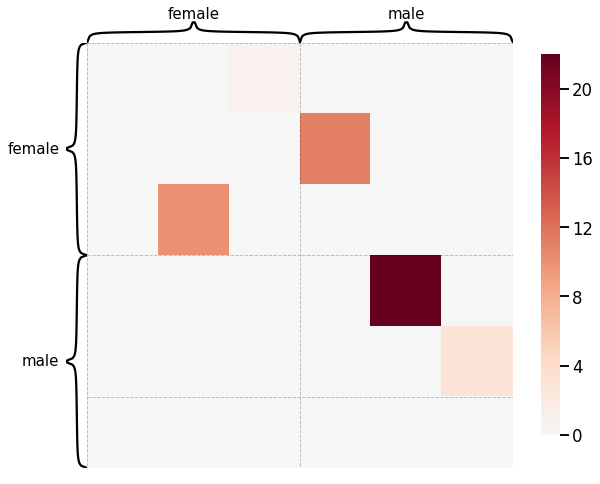

In [85]:
from graspy.plot import heatmap

title = 'Trial heatmap'

labels = np.array(labels)


print(new.shape[0])


fig= heatmap(new, title=title, inner_hier_labels = labels)
fig